# Diabetics Prediction

Name : Aswani S

Organisation : Entri-Elevate

# Overview of the problem statement

This project focuses on predicting the presence of diabetes in individuals using a dataset consisting of various health indicators such as BMI, physical activity, general health, age, smoking habits, and other lifestyle-related and demographic features.

# Objective 

The goal of this project is to develop a classification model that can accurately predict whether an individual is diabetic or not.A successful predictive model can help healthcare providers and policymakers identify at-risk individuals, enabling proactive measures like awareness campaigns, lifestyle modifications, and medical screenings.

# Data Description

In [3]:
#import all libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler

In [4]:
#Read the data
data=pd.read_excel('cdc diabetics.xlsx')
data.head(5)

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0,1,0,1,26,0,0,0,1,0,...,1,0,3,5,30,0,1,4,6,8
1,0,1,1,1,26,1,1,0,0,1,...,1,0,3,0,0,0,1,12,6,8
2,0,0,0,1,26,0,0,0,1,1,...,1,0,1,0,10,0,1,13,6,8
3,0,1,1,1,28,1,0,0,1,1,...,1,0,3,0,3,0,1,11,6,8
4,0,0,0,1,29,1,0,0,1,1,...,1,0,2,0,0,0,0,8,5,8


# Data Collection

In [5]:
#Data is taken from UCI about the diabeticd prediction using health indicators
#Print the column names in dataset
data.columns

Index(['Diabetes_binary', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

In [6]:
data.shape #Shape of the dataset

(70692, 22)

# Data Preprocessing and Data cleaning

In [7]:
#Delete unnecessary columns from dataset
data = data.drop(['Income','Education','Sex'], axis=1)
data.head(5)

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Age
0,0,1,0,1,26,0,0,0,1,0,1,0,1,0,3,5,30,0,4
1,0,1,1,1,26,1,1,0,0,1,0,0,1,0,3,0,0,0,12
2,0,0,0,1,26,0,0,0,1,1,1,0,1,0,1,0,10,0,13
3,0,1,1,1,28,1,0,0,1,1,1,0,1,0,3,0,3,0,11
4,0,0,0,1,29,1,0,0,1,1,1,0,1,0,2,0,0,0,8


In [8]:
#calculate shape of dataset
data.shape

(70692, 19)

In [9]:
#Find statistical table
data.describe()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Age
count,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000
mean,0.500000,0.563458,0.525703,0.975259,29.856985,0.475273,0.062171,0.147810,0.703036,0.611795,0.788774,0.042721,0.954960,0.093914,2.837082,3.752037,5.810417,0.252730,8.584055
std,0.500004,0.495960,0.499342,0.155336,7.113954,0.499392,0.241468,0.354914,0.456924,0.487345,0.408181,0.202228,0.207394,0.291712,1.113565,8.155627,10.062261,0.434581,2.852153
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,7.000000
50%,0.500000,1.000000,1.000000,1.000000,29.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.000000,0.000000,0.000000,9.000000
75%,1.000000,1.000000,1.000000,1.000000,33.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,4.000000,2.000000,6.000000,1.000000,11.000000
max,1.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,13.000000


In [10]:
#Finding is there any null values are present
data.isnull().sum()

Diabetes_binary         0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Age                     0
dtype: int64

No null values are present in dataset

In [11]:
data.duplicated().sum()
print("Data duplicated in dataset is:",data.duplicated().sum())

Data duplicated in dataset is: 8594


In [12]:
#Removing duplicates
data = data.drop_duplicates()
data.duplicated().sum()

0

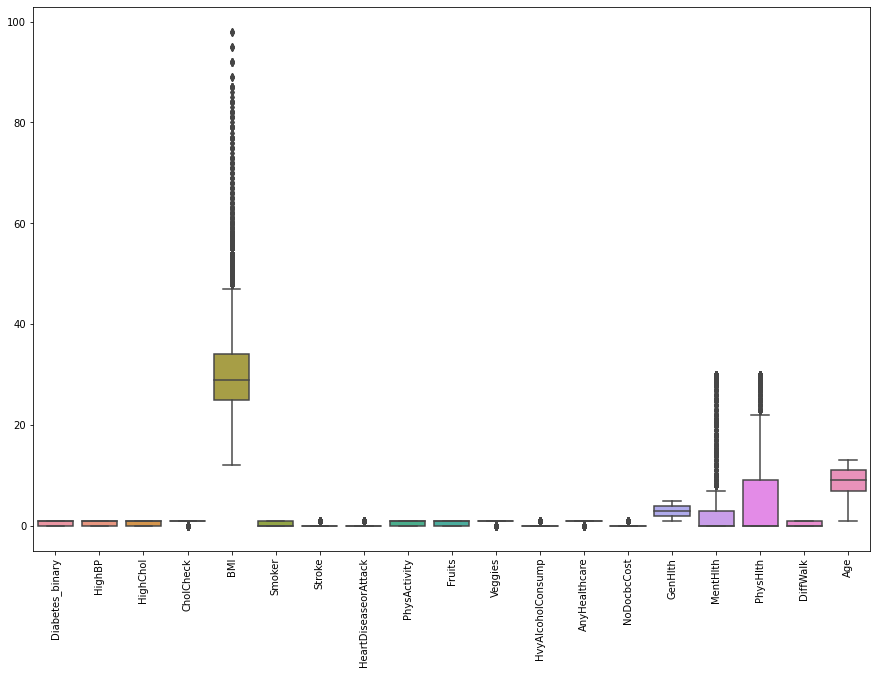

In [13]:
# Detect outliers visually using boxplots
plt.figure(figsize=(15, 10))
sns.boxplot(data=data)
plt.xticks(rotation=90)
plt.show()


In [66]:
#IQR method
Q1 = data.quantile(0.25)  # First quartile
Q3 = data.quantile(0.75)  # Third quartile
IQR = Q3 - Q1             # Interquartile range

# Filter the dataset to remove outliers
data = data[~((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).any(axis=1)]

print("Shape after outlier removal:", data.shape)


Shape after outlier removal: (7668, 19)


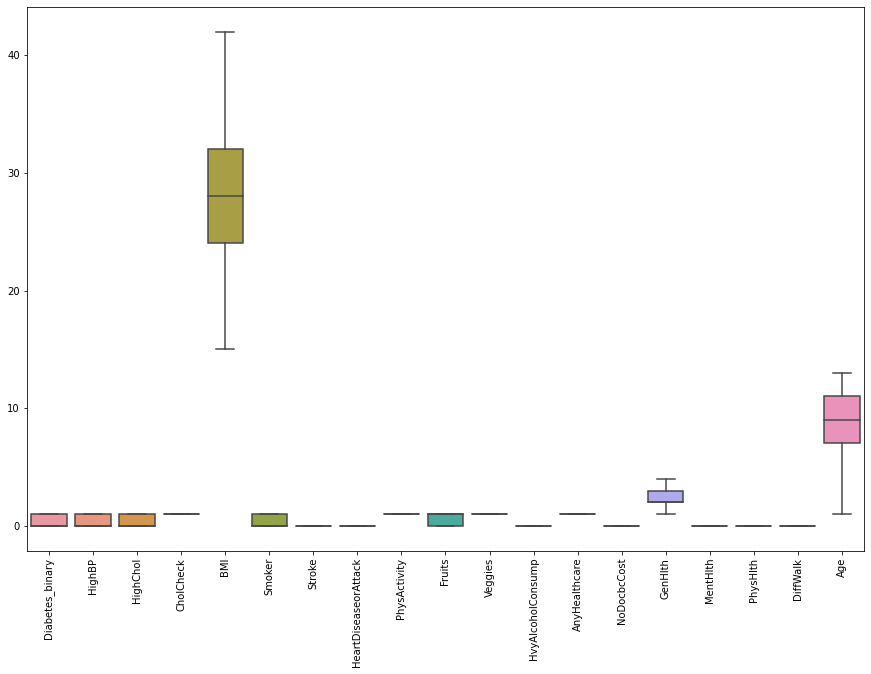

In [67]:
# Boxplots after ouliers are removed
plt.figure(figsize=(15, 10))
sns.boxplot(data=data)
plt.xticks(rotation=90)
plt.show()


In [68]:
# Check skewness of each feature
print(data.skew())

Diabetes_binary         0.346300
HighBP                  0.132816
HighChol                0.188135
CholCheck               0.000000
BMI                     0.334947
Smoker                  0.251892
Stroke                  0.000000
HeartDiseaseorAttack    0.000000
PhysActivity            0.000000
Fruits                 -0.591410
Veggies                 0.000000
HvyAlcoholConsump       0.000000
AnyHealthcare           0.000000
NoDocbcCost             0.000000
GenHlth                 0.125048
MentHlth                0.000000
PhysHlth                0.000000
DiffWalk                0.000000
Age                    -0.511588
dtype: float64


In [69]:
num_cols = data.select_dtypes(include='number').columns
skewness = data[num_cols].skew()

# Categorize skewness
no_skewness = skewness[(skewness >= -0.5) & (skewness <= 0.5)]
moderate_skewness = skewness[(skewness > 0.5) & (skewness <= 1) | (skewness < -0.5) & (skewness >= -1)]
high_skewness = skewness[(skewness > 1) | (skewness < -1)]

In [70]:
print(no_skewness)

Diabetes_binary         0.346300
HighBP                  0.132816
HighChol                0.188135
CholCheck               0.000000
BMI                     0.334947
Smoker                  0.251892
Stroke                  0.000000
HeartDiseaseorAttack    0.000000
PhysActivity            0.000000
Veggies                 0.000000
HvyAlcoholConsump       0.000000
AnyHealthcare           0.000000
NoDocbcCost             0.000000
GenHlth                 0.125048
MentHlth                0.000000
PhysHlth                0.000000
DiffWalk                0.000000
dtype: float64


In [71]:
print(moderate_skewness)

Fruits   -0.591410
Age      -0.511588
dtype: float64


In [72]:
print(high_skewness)

Series([], dtype: float64)


# Exploratory Data Analysis (EDA)

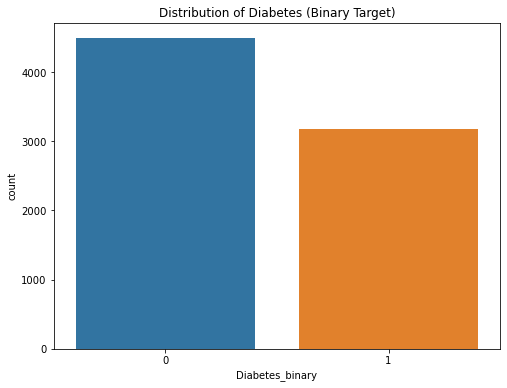

In [73]:
#Visualise the data where count to evaluate 
plt.figure(figsize=(8, 6))
sns.countplot(x='Diabetes_binary', data=data)
plt.title("Distribution of Diabetes (Binary Target)")
plt.show()

Here diabetic patients are less than the patients without diabetics

In [74]:
# Select numerical and categorical features
numerical_features = data.select_dtypes(include=['float64', 'int64']).columns
categorical_features = data.select_dtypes(include=['object', 'category']).columns

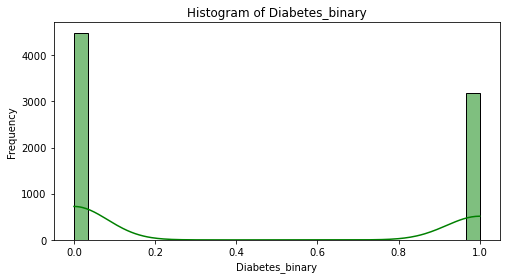

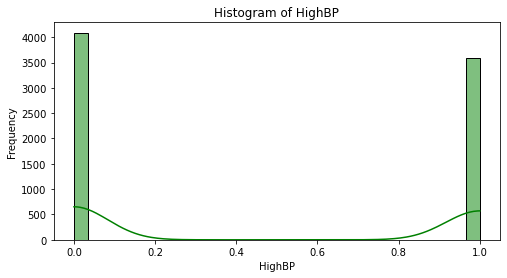

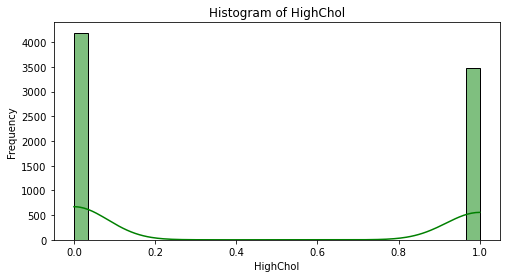

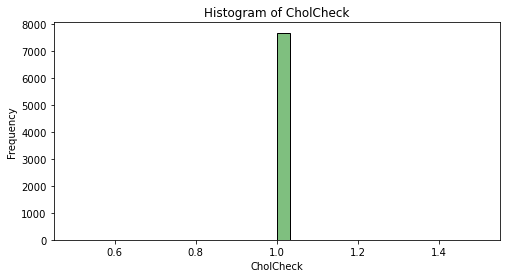

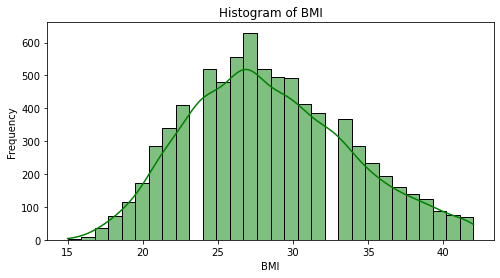

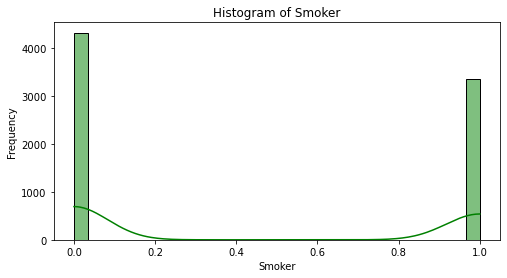

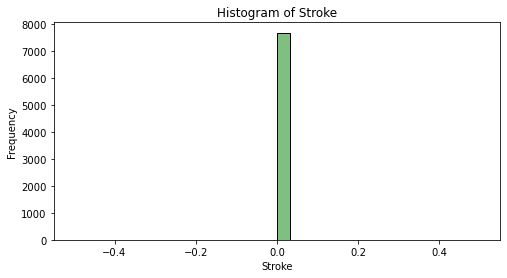

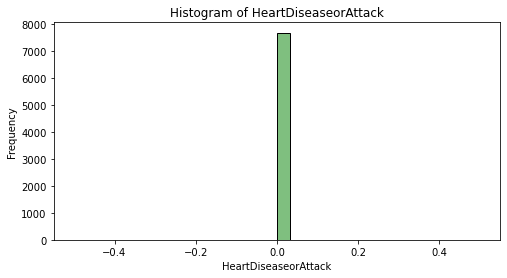

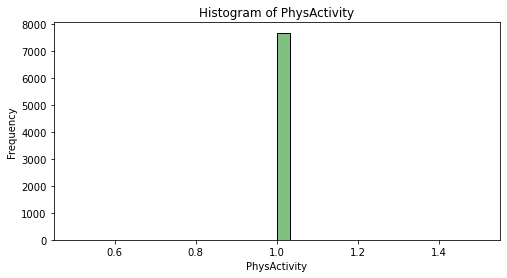

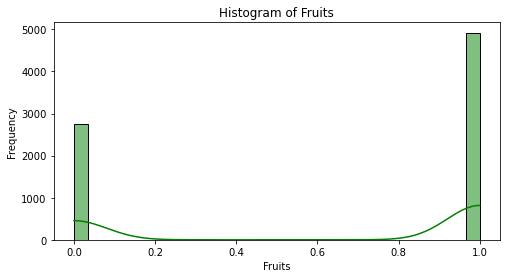

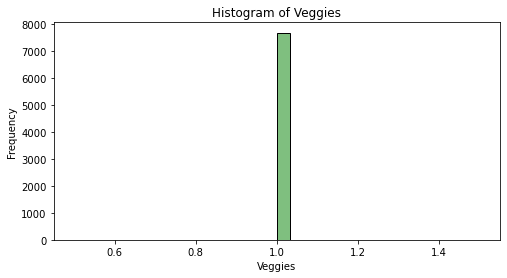

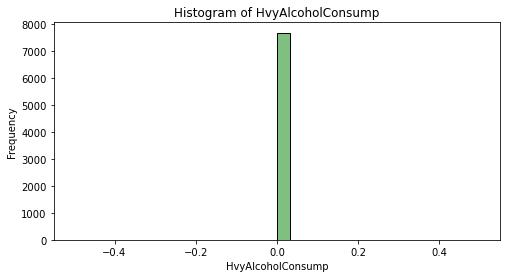

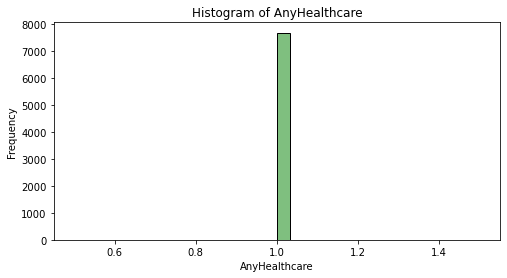

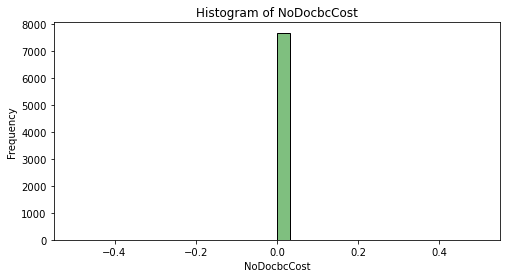

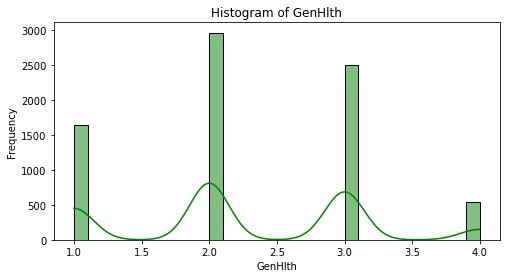

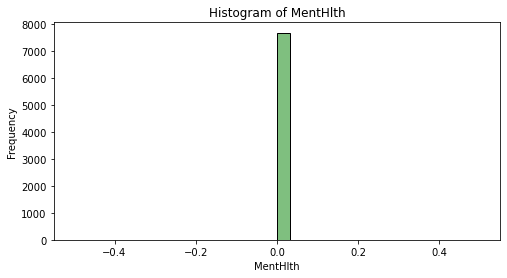

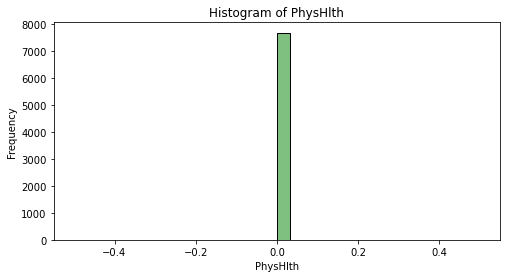

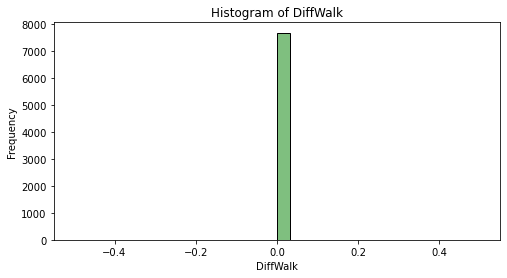

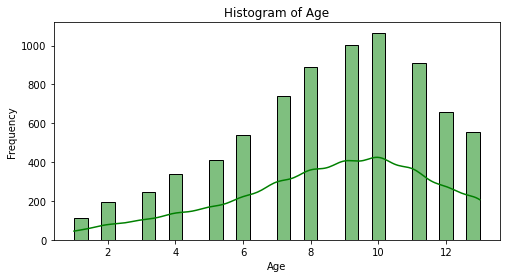

In [75]:
#Histogram
for feature in numerical_features:
    plt.figure(figsize=(8, 4))
    sns.histplot(data[feature], kde=True, bins=30, color='green')
    plt.title(f'Histogram of {feature}')
    plt.xlabel(feature)
    plt.ylabel("Frequency")
    plt.show()


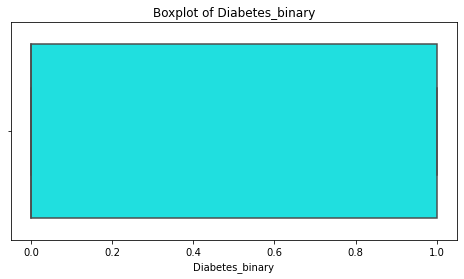

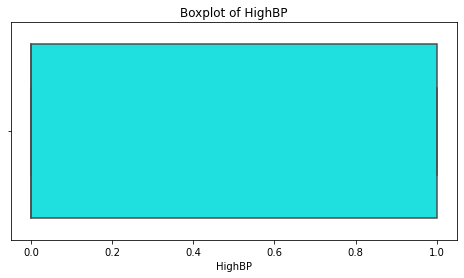

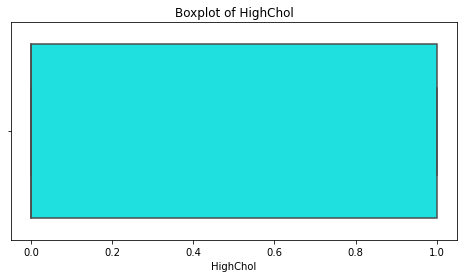

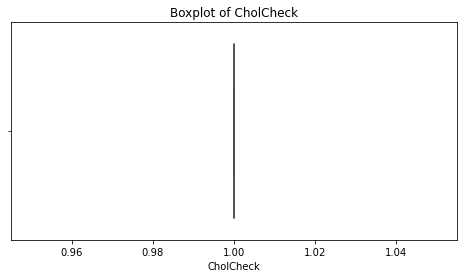

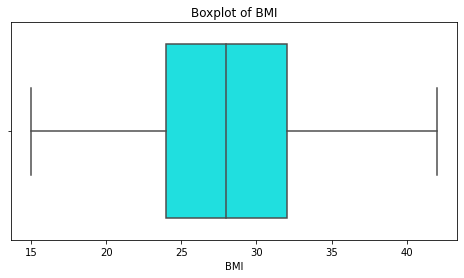

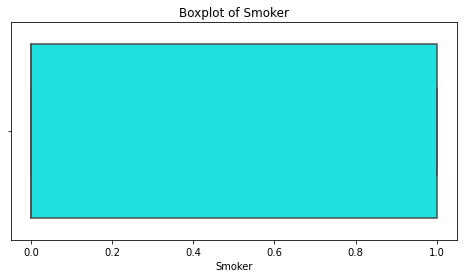

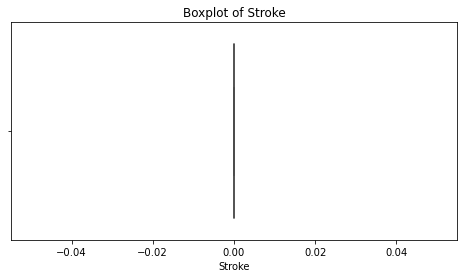

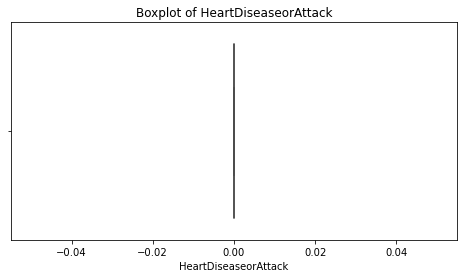

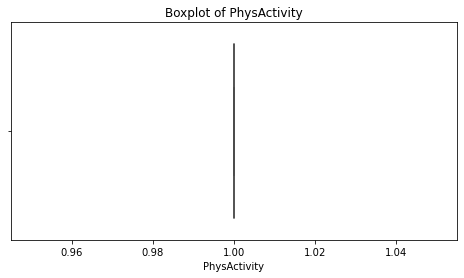

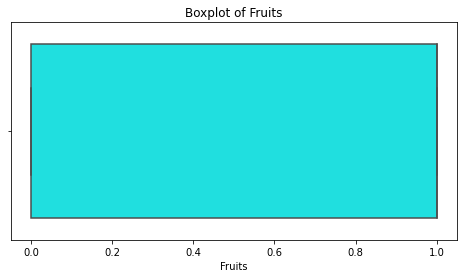

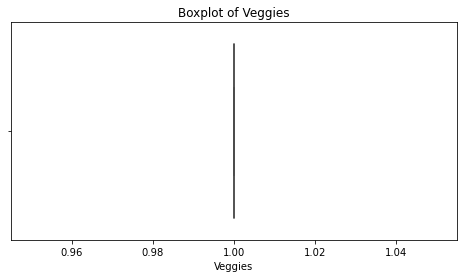

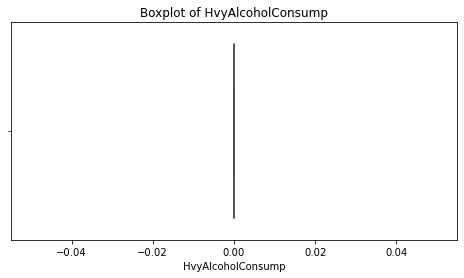

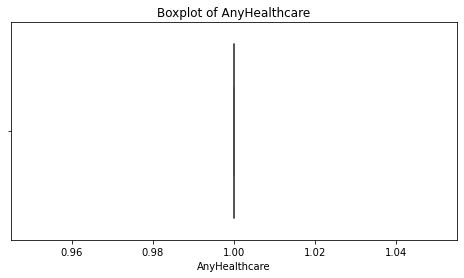

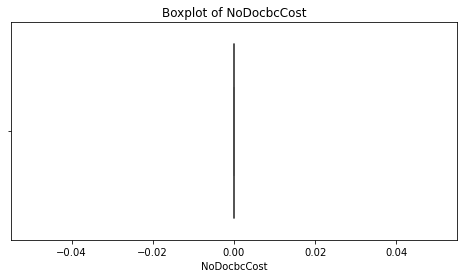

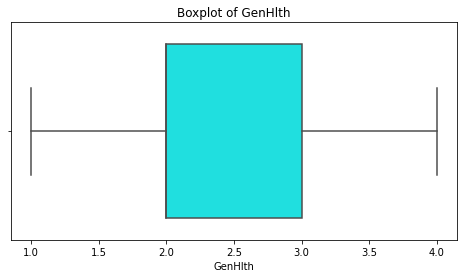

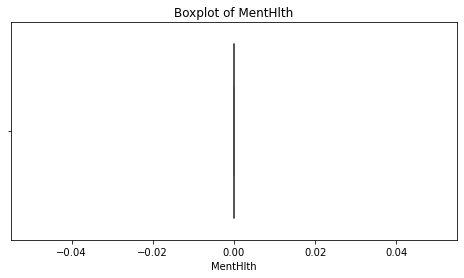

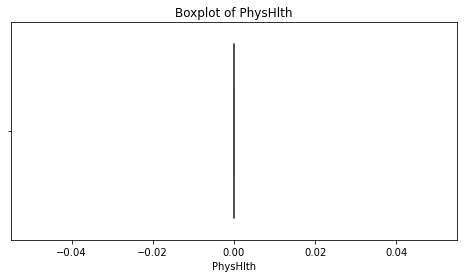

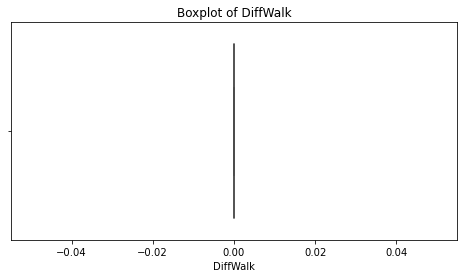

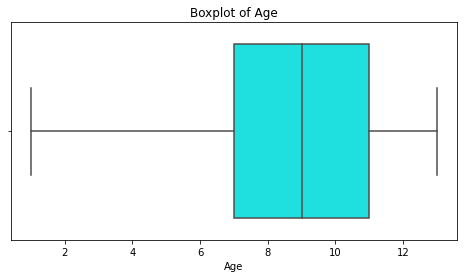

In [76]:
#Boxplot
for feature in numerical_features:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=data[feature], color='cyan')
    plt.title(f'Boxplot of {feature}')
    plt.xlabel(feature)
    plt.show()

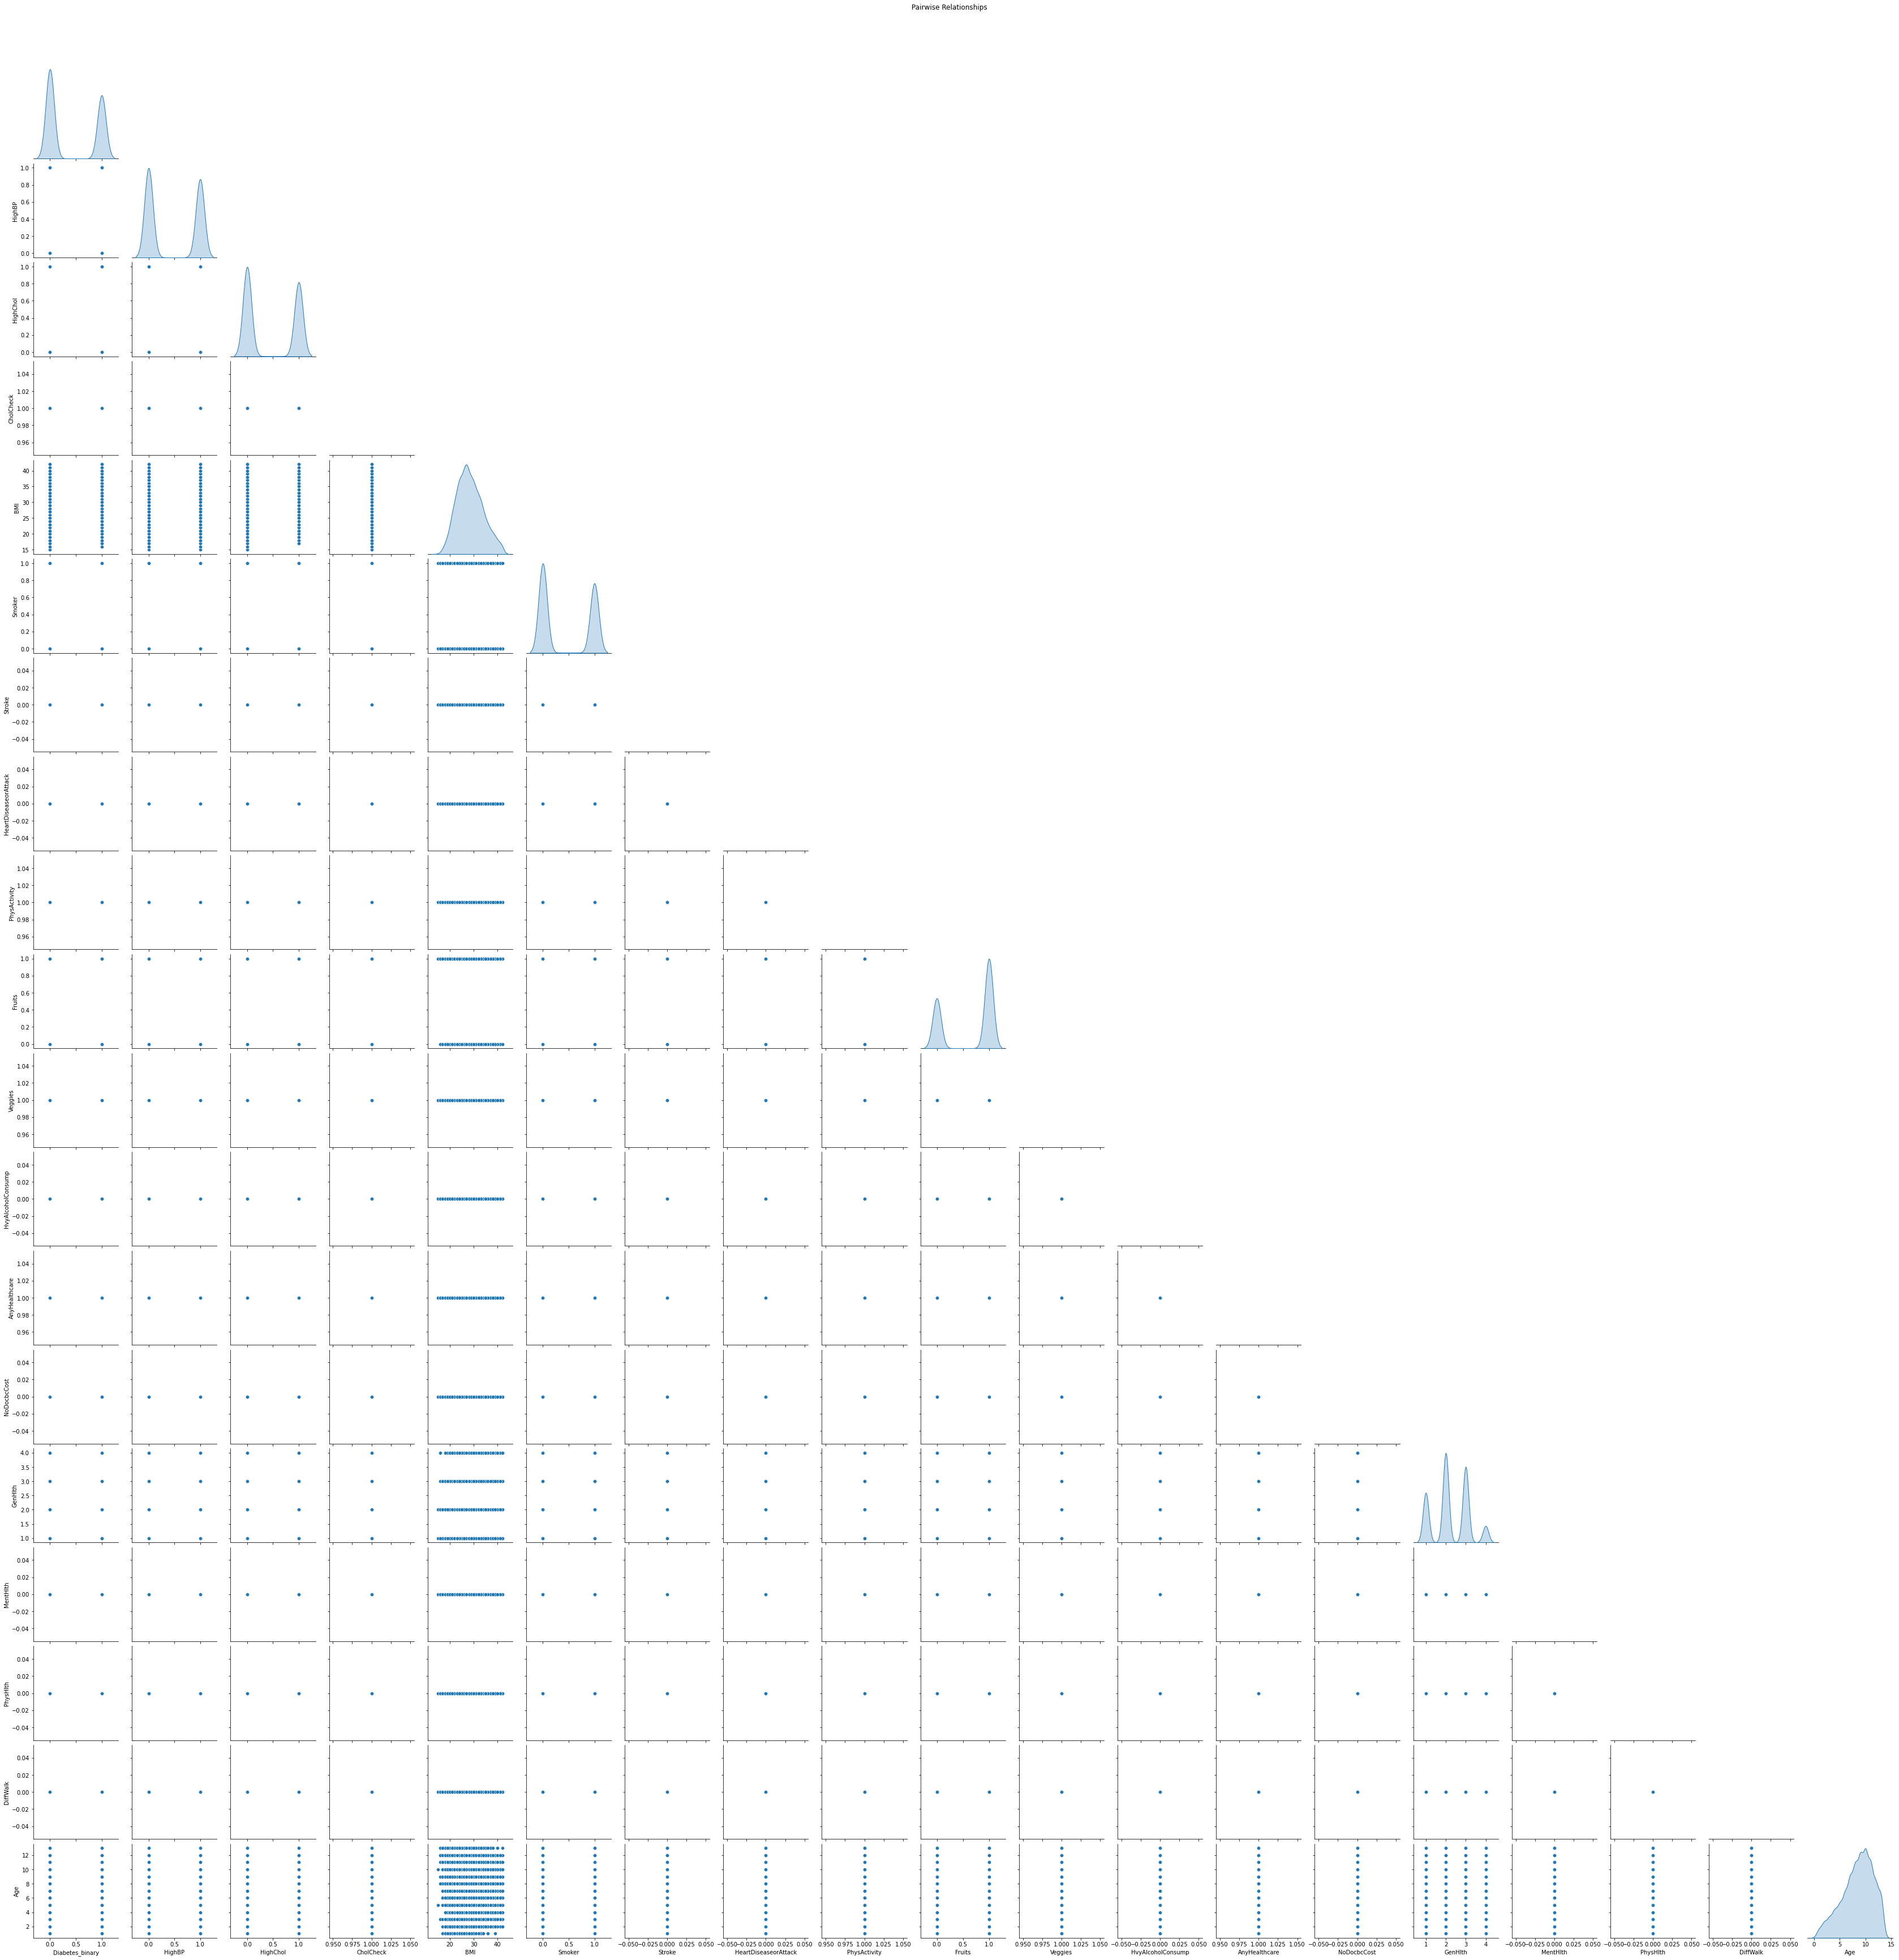

In [77]:
#Pair plot
sns.pairplot(data[numerical_features], diag_kind='kde', corner=True)
plt.suptitle("Pairwise Relationships", y=1.02)
plt.show()


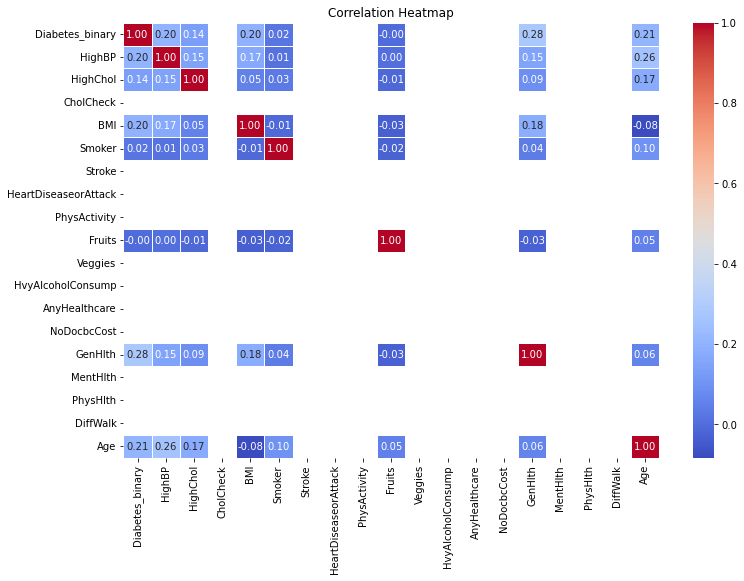

In [78]:
#Heatmap
plt.figure(figsize=(12, 8))
correlation_matrix = data[numerical_features].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

Features like HighBP (high blood pressure) and CholCheck may show stronger correlations with the target (diabetes_binary).
This indicates these variables could be significant predictors for diabetes.

# Feature Engineering

In [79]:
# Apply one-hot encoding
df_one_hot = pd.get_dummies(data, columns=categorical_features, drop_first=True)
print("One-Hot Encoded DataFrame:")
df_one_hot.head()


One-Hot Encoded DataFrame:


,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Age
4,0,0,0,1,29,1,0,0,1,1,1,0,1,0,2,0,0,0,8
8,0,0,0,1,32,0,0,0,1,1,1,0,1,0,3,0,0,0,3
11,0,0,0,1,21,0,0,0,1,1,1,0,1,0,1,0,0,0,4
12,0,1,1,1,27,0,0,0,1,1,1,0,1,0,2,0,0,0,7
16,0,0,0,1,30,0,0,0,1,0,1,0,1,0,2,0,0,0,9


# Feature Selection

In [80]:
# Define target variable and features
X = data.drop(columns=['Diabetes_binary'])  
y = data['Diabetes_binary']

In [81]:
X

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Age
4,0,0,1,29,1,0,0,1,1,1,0,1,0,2,0,0,0,8
8,0,0,1,32,0,0,0,1,1,1,0,1,0,3,0,0,0,3
11,0,0,1,21,0,0,0,1,1,1,0,1,0,1,0,0,0,4
12,1,1,1,27,0,0,0,1,1,1,0,1,0,2,0,0,0,7
16,0,0,1,30,0,0,0,1,0,1,0,1,0,2,0,0,0,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70630,0,1,1,35,0,0,0,1,1,1,0,1,0,1,0,0,0,7
70646,0,0,1,27,1,0,0,1,1,1,0,1,0,3,0,0,0,8
70655,1,1,1,30,0,0,0,1,1,1,0,1,0,3,0,0,0,5
70661,1,1,1,24,0,0,0,1,1,1,0,1,0,4,0,0,0,13


In [82]:
y

4        0
8        0
11       0
12       0
16       0
        ..
70630    1
70646    1
70655    1
70661    1
70685    1
Name: Diabetes_binary, Length: 7668, dtype: int64

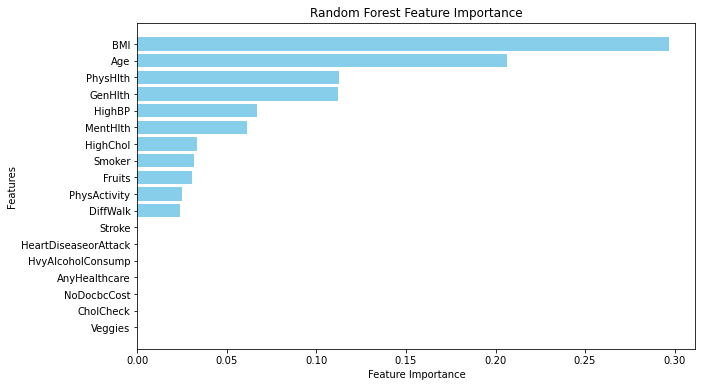

Top Features Selected by Random Forest:
3              BMI
17             Age
15        PhysHlth
13         GenHlth
0           HighBP
14        MentHlth
1         HighChol
4           Smoker
8           Fruits
7     PhysActivity
16        DiffWalk
Name: Feature, dtype: object


In [31]:
from sklearn.ensemble import RandomForestClassifier


# Fit Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X, y)

# Get feature importance
feature_importances = pd.DataFrame({'Feature': X.columns, 
                                     'Importance': rf.feature_importances_})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importances['Feature'], feature_importances['Importance'], color='skyblue')
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Random Forest Feature Importance')
plt.gca().invert_yaxis()
plt.show()

# Select top features based on importance
top_features_rf = feature_importances[feature_importances['Importance'] > 0.01]['Feature']
print("Top Features Selected by Random Forest:")
print(top_features_rf)


# Split Data into Training and Testing Sets

In [83]:
#Split the data to train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Scaling

In [84]:
#Standard scaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build ML Model

Logestic Regression

In [85]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.linear_model import LogisticRegression
model_LR = LogisticRegression()
model_LR.fit(X_train, y_train)

LogisticRegression()

In [86]:
ypred_LR=model_LR.predict(X_test)
accuracy_LR=accuracy_score(y_test,ypred_LR)
accuracy_LR

0.6838331160365059

In [87]:
#Classification report
print("\nClassification Report:")
print(classification_report(y_test,ypred_LR))


Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.79      0.75       924
           1       0.62      0.53      0.57       610

    accuracy                           0.68      1534
   macro avg       0.67      0.66      0.66      1534
weighted avg       0.68      0.68      0.68      1534



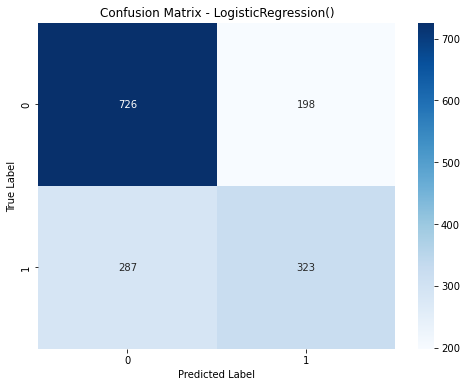

In [88]:
# Plot confusion matrix
cm = confusion_matrix(y_test, ypred_LR)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title(f'Confusion Matrix - {model_LR}')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

Decision Tree Classifier

In [89]:
from sklearn.tree import DecisionTreeClassifier
model_DT=DecisionTreeClassifier(max_depth=3,random_state=42,criterion='entropy')
model_DT.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=42)

In [90]:
ypred_DT=model_DT.predict(X_test)
accuracy_DT=accuracy_score(y_test,ypred_DT)
accuracy_DT

0.6329856584093873

In [91]:
#Classification report
print("\nClassification Report:")
print(classification_report(y_test,ypred_DT))


Classification Report:
              precision    recall  f1-score   support

           0       0.63      0.97      0.76       924
           1       0.74      0.12      0.21       610

    accuracy                           0.63      1534
   macro avg       0.68      0.55      0.48      1534
weighted avg       0.67      0.63      0.54      1534



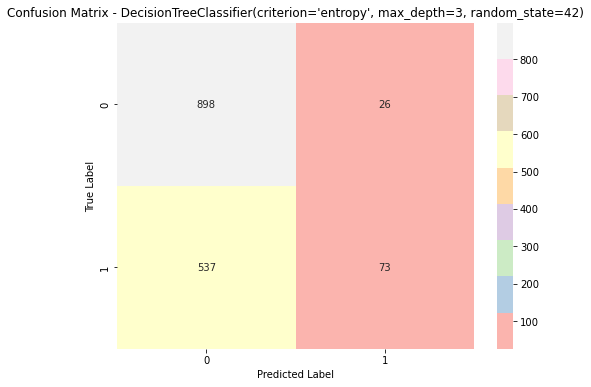

In [92]:
# Plot confusion matrix
cm = confusion_matrix(y_test, ypred_DT)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Pastel1')
plt.title(f'Confusion Matrix - {model_DT}')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

Random Forest Classifier

In [93]:
from sklearn.ensemble import RandomForestClassifier
model_RF=RandomForestClassifier(random_state=42)
model_RF.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

In [94]:
ypred_RF=model_RF.predict(X_test)
accuracy_RF=accuracy_score(y_test,ypred_DT)
accuracy_RF

0.6329856584093873

In [95]:
importances = model_RF.feature_importances_
feature_names = X.columns

# Combine feature names with their importance scores
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Display the feature importance
print(feature_importance_df)


                 Feature  Importance
3                    BMI    0.450100
17                   Age    0.295310
13               GenHlth    0.131613
0                 HighBP    0.042342
1               HighChol    0.032214
8                 Fruits    0.024777
4                 Smoker    0.023645
5                 Stroke    0.000000
6   HeartDiseaseorAttack    0.000000
7           PhysActivity    0.000000
10     HvyAlcoholConsump    0.000000
11         AnyHealthcare    0.000000
12           NoDocbcCost    0.000000
2              CholCheck    0.000000
14              MentHlth    0.000000
15              PhysHlth    0.000000
16              DiffWalk    0.000000
9                Veggies    0.000000


In [96]:
y_truth=y_test
y_predicted=model_RF.predict(X_test)
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_truth,y_predicted)
cm

array([[522, 402],
       [394, 216]], dtype=int64)

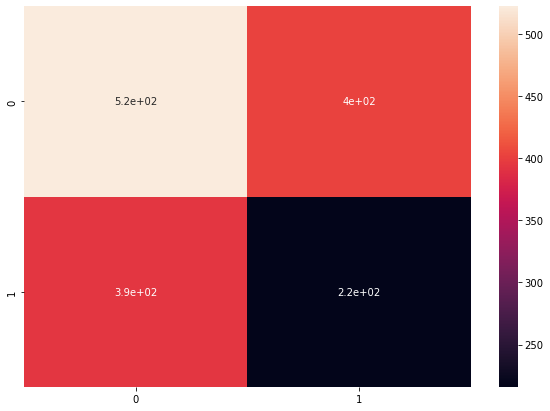

In [97]:
plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True)
plt.show()

Support Vector Machine

In [98]:
from sklearn.svm import SVC
model_SVC=SVC()
model_SVC.fit(X_train,y_train)

SVC()

In [99]:
ypred_SVC=model_SVC.predict(X_test)
accuracy_SVC=accuracy_score(y_test,ypred_DT)
accuracy_SVC

0.6329856584093873

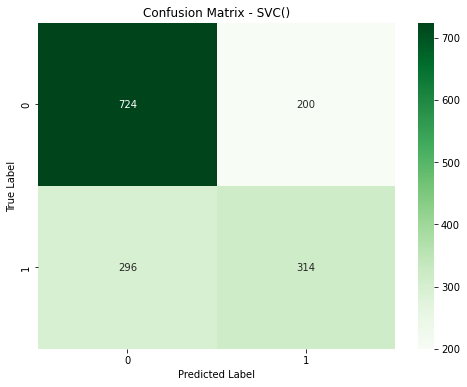

In [100]:
# Plot confusion matrix
cm = confusion_matrix(y_test, ypred_SVC)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens')
plt.title(f'Confusion Matrix - {model_SVC}')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

In [101]:
#Linear kernal
model_SVC=SVC(kernel='linear')
model_SVC.fit(X_train,y_train)
ypred=model_SVC.predict(X_test)
print('Accuracy of our Linear kernal model is', accuracy_score(y_test,ypred))

Accuracy of our Linear kernal model is 0.6844850065189049


In [102]:
#Polynomial kernal
model_SVC=SVC(kernel='poly',degree=3)
model_SVC.fit(X_train,y_train)
yprd=model_SVC.predict(X_test)
print('Accuracy of our polynomial kernal model is',accuracy_score(y_test,yprd))

Accuracy of our polynomial kernal model is 0.6681877444589309


In [103]:
#Gaussian Model
model_SVC=SVC(kernel='rbf')
model_SVC.fit(X_train,y_train)
ypredict=model_SVC.predict(X_test)
print("Accuracy of our Gaussian model is",accuracy_score(y_test,ypredict))

Accuracy of our Gaussian model is 0.6766623207301173


K-Nearest Neighbour

In [104]:
#fitting K-NN classifier to the training set
from sklearn.neighbors import KNeighborsClassifier
classifier=KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train,y_train)

KNeighborsClassifier()

In [105]:
ypred_classifier=classifier.predict(X_test)
accuracy_classifier=accuracy_score(y_test,ypred_classifier)
accuracy_classifier

0.5893089960886571

# Model Evaluation

In [106]:
# 11. Build and evaluate models
print("\nTraining models...")
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier

# Define classification models
models = {
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    'SVM': SVC(random_state=42, probability=True),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'MLP Classifier': MLPClassifier(random_state=42, max_iter=1000)
}



Training models...


In [107]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Initialize results dictionary
results = {}

for name, model in models.items():
    print(f"\nTraining {name}...")
    model.fit(X_train, y_train)  # Train the model
    y_pred = model.predict(X_test)  # Predict on test data
    
    # 12. Model Evaluation
    results[name] = {
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred, average='weighted'),
        'Recall': recall_score(y_test, y_pred, average='weighted'),
        'F1-Score': f1_score(y_test, y_pred, average='weighted'),
        'Confusion Matrix': confusion_matrix(y_test, y_pred).tolist()  # Converting to list for better readability
    }
    
    # Print evaluation metrics for each model
    print(f"{name} Results:")
    print(f"Accuracy: {results[name]['Accuracy']:.4f}")
    print(f"Precision: {results[name]['Precision']:.4f}")
    print(f"Recall: {results[name]['Recall']:.4f}")
    print(f"F1-Score: {results[name]['F1-Score']:.4f}")
    print("Confusion Matrix:\n", results[name]['Confusion Matrix'])



Training Logistic Regression...
Logistic Regression Results:
Accuracy: 0.6838
Precision: 0.6782
Recall: 0.6838
F1-Score: 0.6787
Confusion Matrix:
 [[726, 198], [287, 323]]

Training SVM...
SVM Results:
Accuracy: 0.6767
Precision: 0.6705
Recall: 0.6767
F1-Score: 0.6708
Confusion Matrix:
 [[724, 200], [296, 314]]

Training Random Forest...
Random Forest Results:
Accuracy: 0.4811
Precision: 0.4822
Recall: 0.4811
F1-Score: 0.4817
Confusion Matrix:
 [[522, 402], [394, 216]]

Training Gradient Boosting...
Gradient Boosting Results:
Accuracy: 0.6832
Precision: 0.6778
Recall: 0.6832
F1-Score: 0.6785
Confusion Matrix:
 [[722, 202], [284, 326]]

Training MLP Classifier...
MLP Classifier Results:
Accuracy: 0.6819
Precision: 0.6795
Recall: 0.6819
F1-Score: 0.6804
Confusion Matrix:
 [[695, 229], [259, 351]]


In [108]:
# Find the best model based on Accuracy (or F1-Score for imbalanced datasets)
best_model_name = max(results.items(), key=lambda x: x[1]['Accuracy'])[0]
best_model = models[best_model_name]
print(f"\nBest Model: {best_model_name}")


Best Model: Logistic Regression


In [109]:
#Finding worst model
# Initialize results dictionary
results = {}

for name, model in models.items():
    print(f"\nEvaluating {name}...")
    y_pred = model.predict(X_test)  # Predict on test data
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')

    # Save results
    results[name] = {
        'Accuracy': accuracy,
        'F1-Score': f1,
    }

# Identify the worst model based on Accuracy
worst_model_name = min(results.items(), key=lambda x: x[1]['Accuracy'])[0]
print(f"\nWorst Model Based on Accuracy: {worst_model_name}")

# Identify the worst model based on F1-Score
worst_model_f1 = min(results.items(), key=lambda x: x[1]['F1-Score'])[0]
print(f"Worst Model Based on F1-Score: {worst_model_f1}")

# Display all results
for name, metrics in results.items():
    print(f"{name}: Accuracy = {metrics['Accuracy']:.4f}, F1-Score = {metrics['F1-Score']:.4f}")



Evaluating Logistic Regression...

Evaluating SVM...

Evaluating Random Forest...

Evaluating Gradient Boosting...

Evaluating MLP Classifier...

Worst Model Based on Accuracy: Random Forest
Worst Model Based on F1-Score: Random Forest
Logistic Regression: Accuracy = 0.6838, F1-Score = 0.6787
SVM: Accuracy = 0.6767, F1-Score = 0.6708
Random Forest: Accuracy = 0.4811, F1-Score = 0.4817
Gradient Boosting: Accuracy = 0.6832, F1-Score = 0.6785
MLP Classifier: Accuracy = 0.6819, F1-Score = 0.6804


# Hyperparameter Tuning

In [115]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
}

# Create grid search object
grid_search = GridSearchCV(
    LogisticRegression(),
    param_grid,
    cv=5,
    scoring='roc_auc',
    n_jobs=-1
)

# Fit grid search
grid_search.fit(X_train, y_train)

# Print best parameters
print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

Best parameters: {'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}
Best score: 0.7255476708729323


In [117]:
# Proper scaling pipeline
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', LogisticRegression())
])

In [119]:
pipeline

Pipeline(steps=[('scaler', StandardScaler()),
                ('classifier', LogisticRegression())])

In [120]:
pipeline.fit(X_train,y_train)
y_pred = pipeline.predict(X_test)

In [121]:
y_pred

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

# Save the model

In [125]:
import joblib
print("\nSaving Model....")
joblib.dump(best_model,'Diabetics_detection_model.joblib')
joblib.dump(scaler,'Diabetics_detection_scaler.joblib')
print("Model and scaler saved as 'Diabetics_detection_model.joblib' and 'Diabetics_detection_scaler.joblib'")


Saving Model....
Model and scaler saved as 'Diabetics_detection_model.joblib' and 'Diabetics_detection_scaler.joblib'


In [131]:
#Saving pipeline
joblib.dump(pipeline, 'Diabetics_prediction_pipeline.joblib')

['Diabetics_prediction_pipeline.joblib']

# Test with Unseen data

In [228]:
#Creating a data with random numbers with same columns with 10 rows
unseen_data = np.random.rand(10, X_test.shape[1])

In [229]:
# Use the pipeline to predict on unseen data
predictions = pipeline.predict(unseen_data)

In [231]:
unseen_labels = np.random.randint(0, 2, size=10)  # Mock true labels for testing
accuracy = accuracy_score(unseen_labels, predictions)

print("Predictions on unseen data:", predictions)
print("Accuracy on unseen data (if labels are available):", accuracy)

Predictions on unseen data: [1 1 1 1 1 1 1 1 1 1]
Accuracy on unseen data (if labels are available): 0.8
